# <center> Video Games Sales Summary Statistics</center>

In [77]:
%matplotlib inline

import datetime as dt
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

from pylab import rcParams

# Set plotting format
#plt.rcParams['figure.figsize'] = (30,20)
%config InlineBackend.figure_format = 'retina'

# Disable notebook warnings
warnings.filterwarnings('ignore')


# Setting Dataframe format
pd.set_option('display.max_columns',1000)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
pd.set_option('precision',2)
sns.set()


### Import Data

In [78]:
vg = pd.DataFrame(pd.read_csv('Data/vgsales.csv', index_col='Rank'))

vg[['NA_Sales','EU_Sales',  'JP_Sales', 'Other_Sales', 
    'Global_Sales']]= vg[['NA_Sales','EU_Sales',  'JP_Sales', 
                          'Other_Sales', 'Global_Sales']]*1000000
vg.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35820000.0
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31370000.0


In [79]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


### Total Sales Distribution by Region

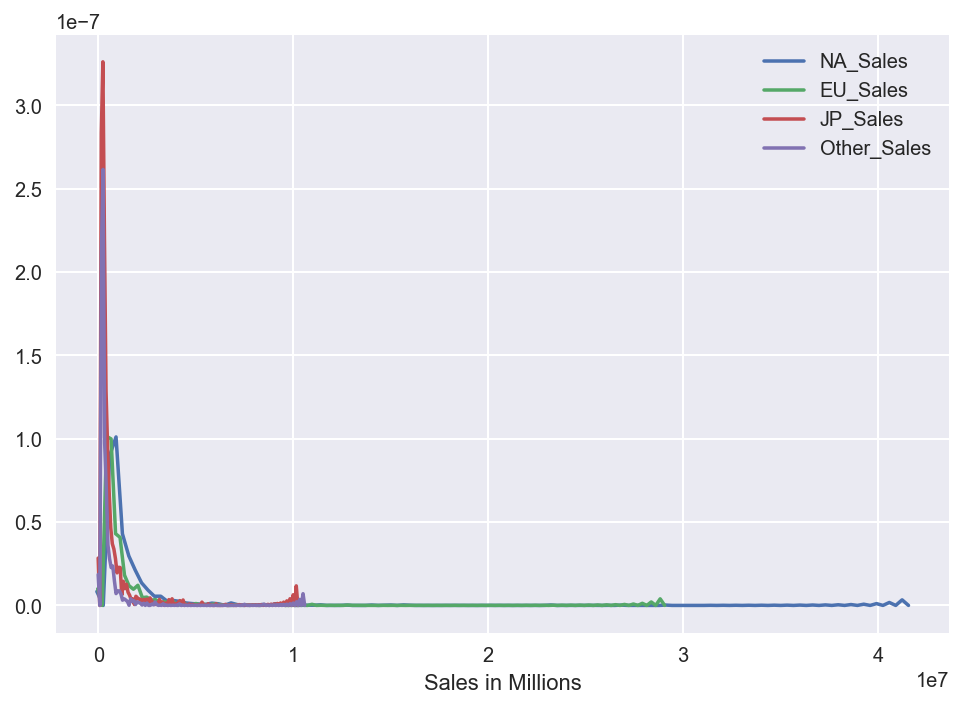

In [80]:
for col in vg.drop(['Name','Platform','Year','Genre','Publisher','Global_Sales'], axis=1):
    sns.kdeplot(vg[col])
plt.xlabel('Sales in Millions')

In [81]:
vg.drop(['Name','Platform','Year','Genre','Publisher'], axis=1).describe().T.drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
NA_Sales,264667.4,816683.0,0.0,0.0,80000.0,240000.0,41490000.0
EU_Sales,146652.0,505351.2,0.0,0.0,20000.0,110000.0,29020000.0
JP_Sales,77781.7,309290.6,0.0,0.0,0.0,40000.0,10220000.0
Other_Sales,48063.0,188588.4,0.0,0.0,10000.0,40000.0,10570000.0
Global_Sales,537440.7,1555027.9,10000.0,60000.0,170000.0,470000.0,82740000.0


### Visualizing Categorical Data

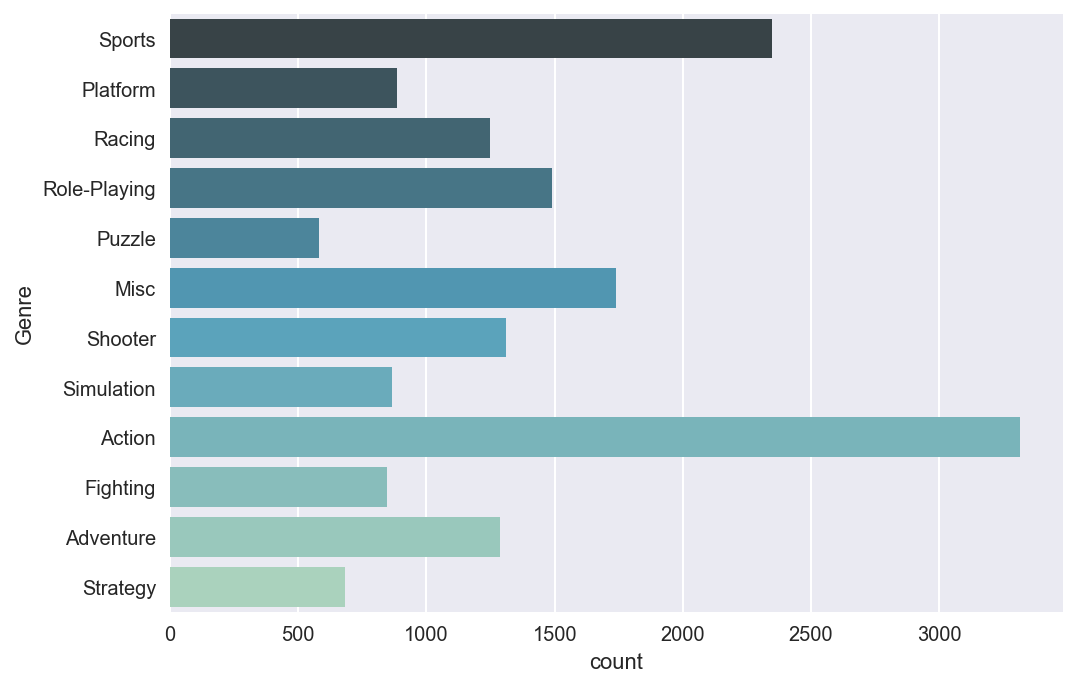

In [82]:
sns.countplot(y=vg['Genre'], palette='GnBu_d')

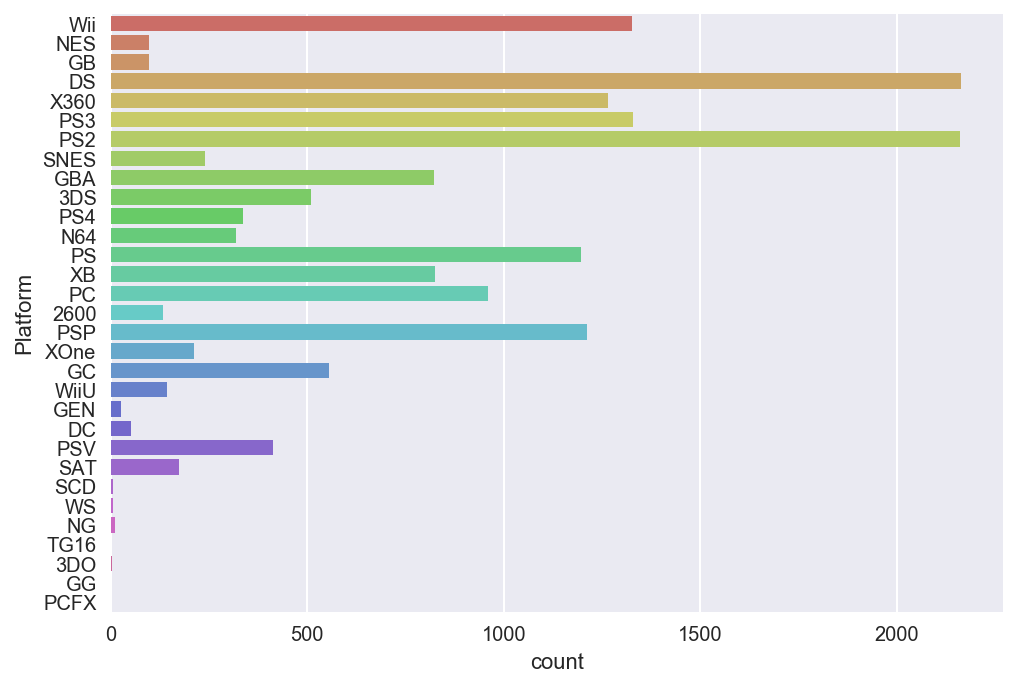

In [83]:
sns.countplot(y=vg['Platform'], palette='hls')

In [84]:
pd.DataFrame(vg.Publisher.value_counts()).head(20)

,Publisher
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
THQ,715
Nintendo,703
Sony Computer Entertainment,683
Sega,639
Take-Two Interactive,413


### Growth of Videos Games Release

In [92]:
s_growth = vg.groupby('Year')[['NA_Sales','EU_Sales',  'JP_Sales', 'Other_Sales', 
    'Global_Sales']].sum()

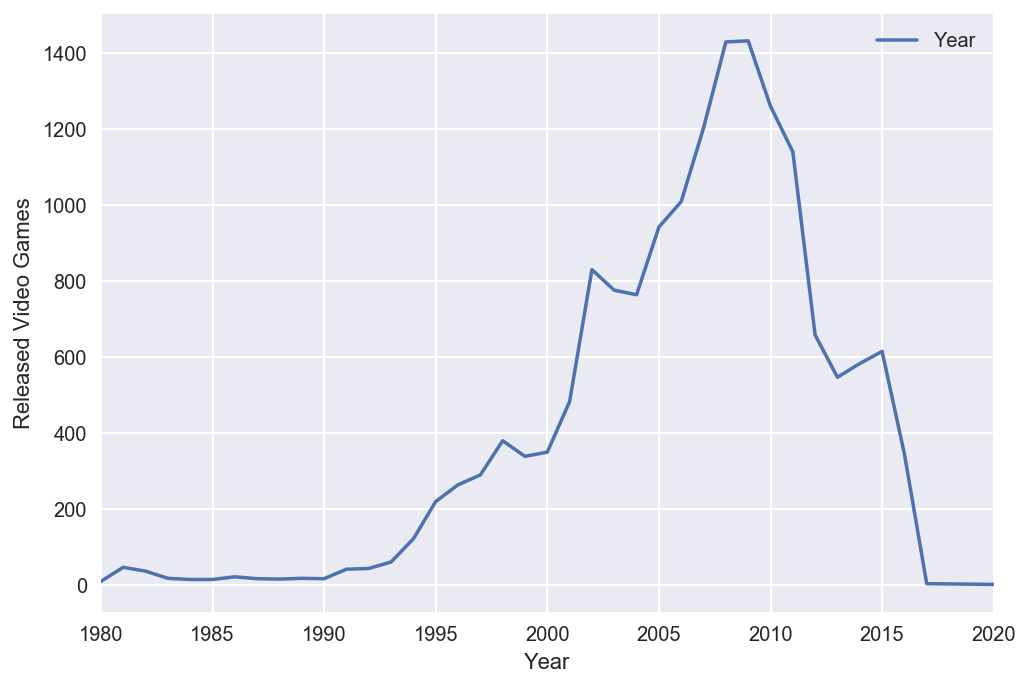

In [93]:
pd.DataFrame(vg.Year.value_counts()).sort_index(axis=0, ascending=True).plot()
plt.ylabel('Released Video Games')
plt.xlabel('Year')

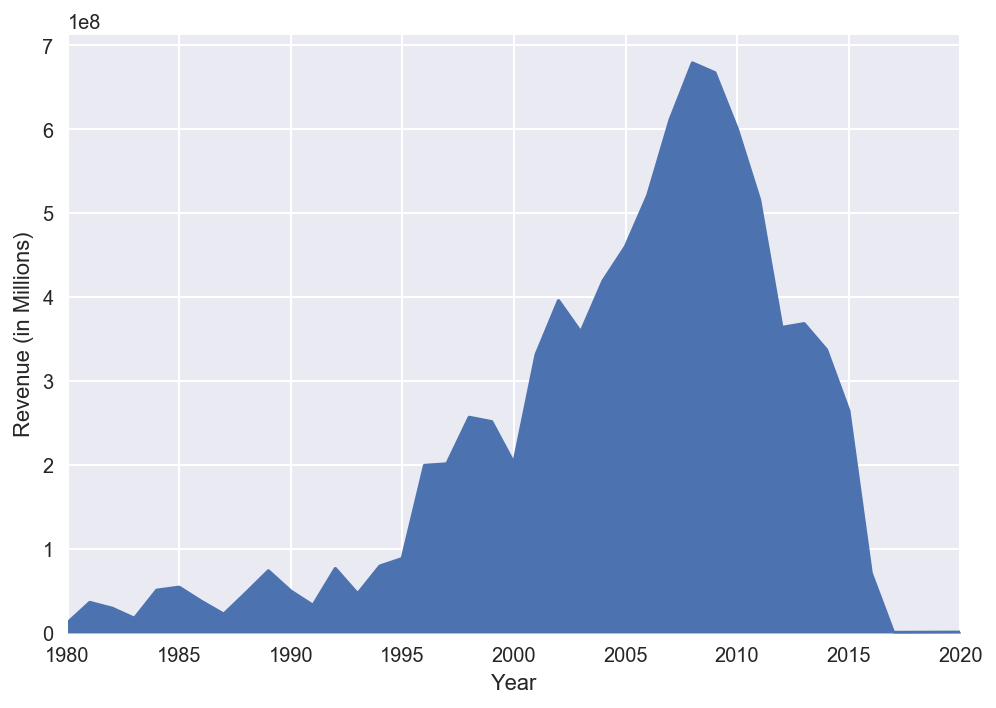

In [94]:
s_growth['Global_Sales'].plot.area()
plt.xlabel('Year') ; plt.ylabel('Revenue (in Millions)')

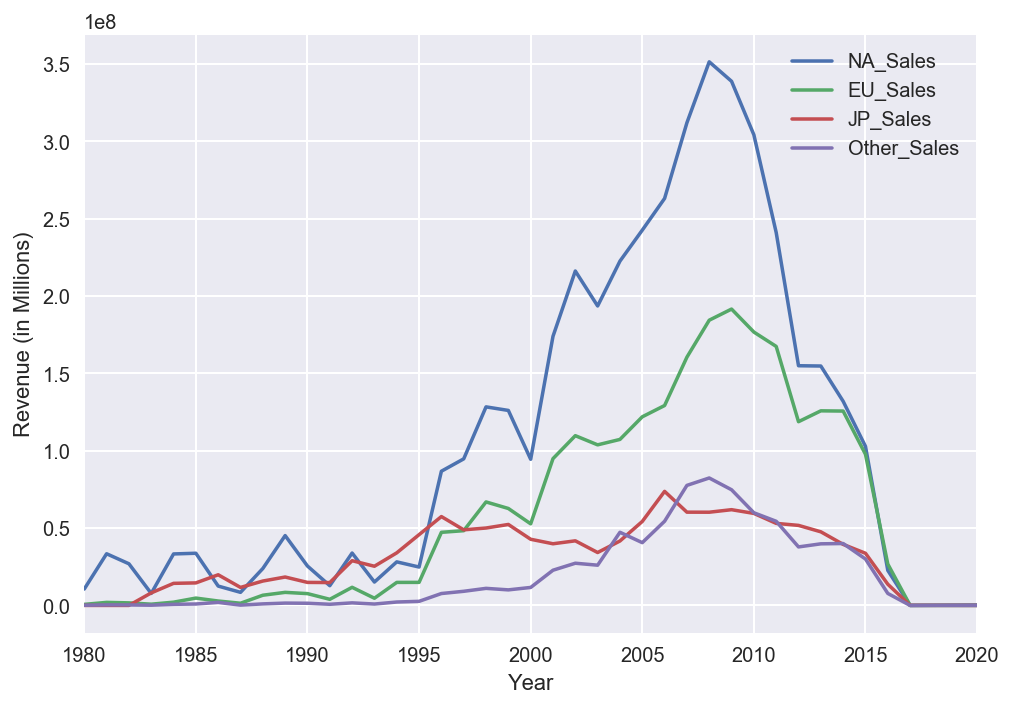

In [100]:
s_growth.drop('Global_Sales', axis=1).plot()
plt.xlabel('Year') ; plt.ylabel('Revenue (in Millions)')

### Platform Sales over the Years

In [117]:
year_platform = vg.groupby(['Year','Platform'])[['NA_Sales','EU_Sales',  'JP_Sales', 'Other_Sales', 
    'Global_Sales']].sum()
year_platform.tail()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year   Platform                                                         
2016.0 X360      360000.0  400000.0       0.0      70000.0      830000.0
       XOne     6690000.0 4630000.0   10000.0    1050000.0    12370000.0
2017.0 PS4            0.0       0.0   30000.0          0.0       30000.0
       PSV            0.0       0.0   20000.0          0.0       20000.0
2020.0 DS        270000.0       0.0       0.0      20000.0      290000.0

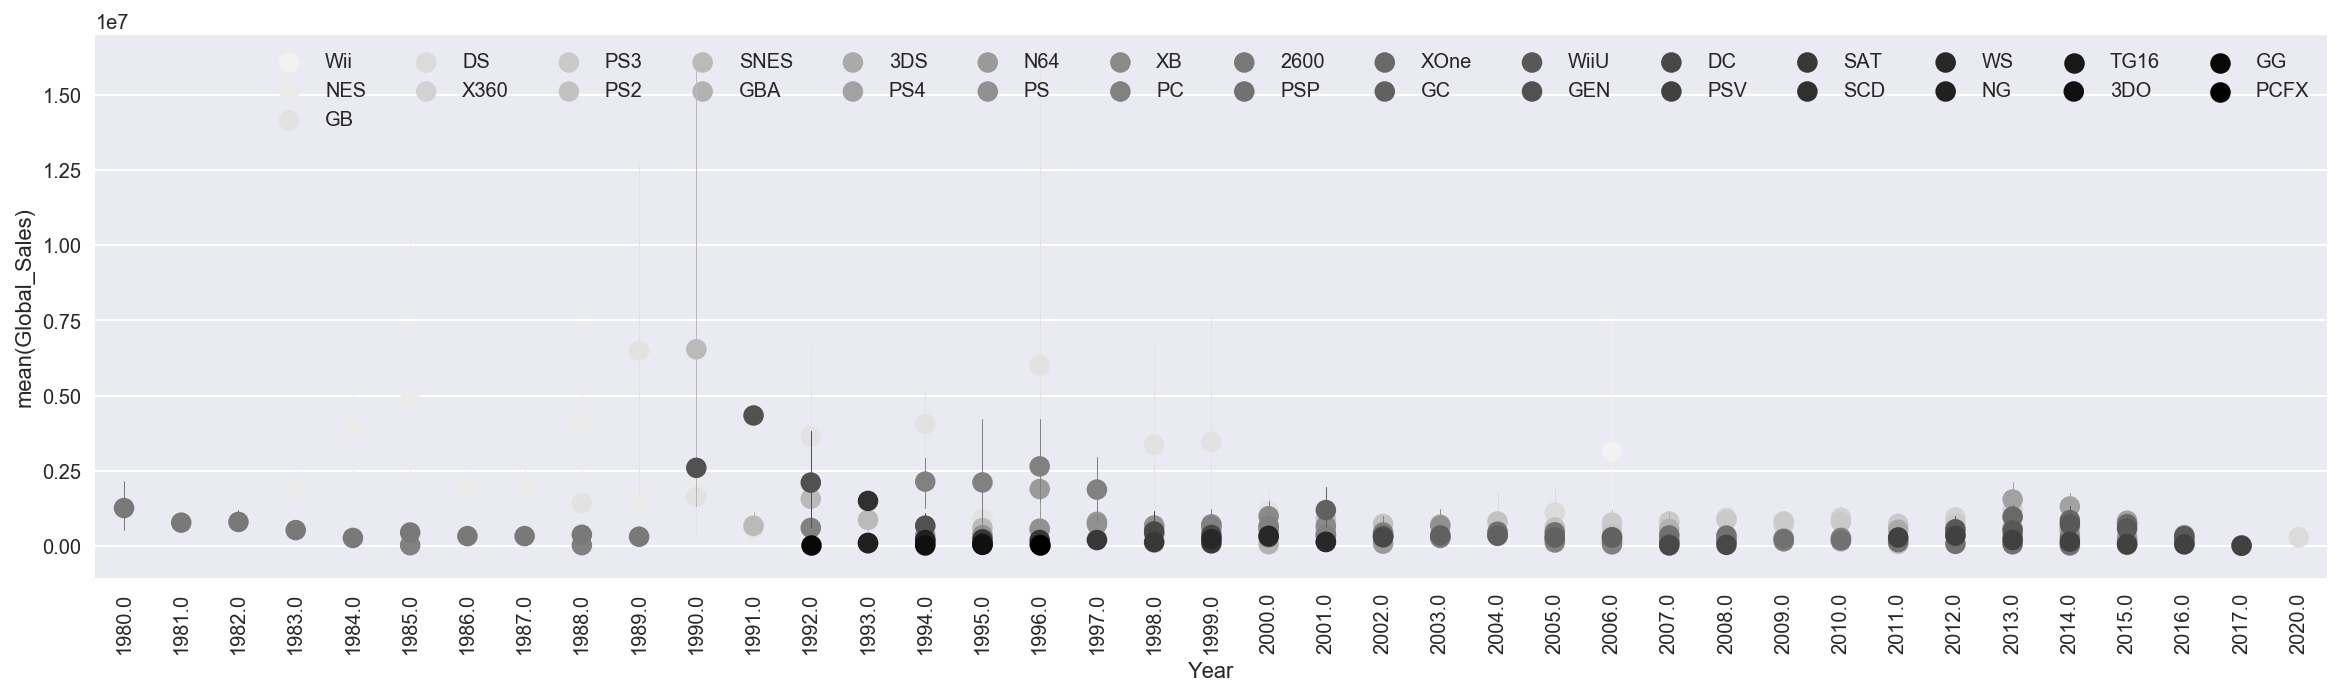

In [169]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.pointplot(data=vg, x='Year', y='Global_Sales', hue='Platform',
             color='black', errwidth=0.5, join=False)
plt.legend(loc='top', ncol=15)


### Genre Sales Over the Year

In [175]:
year_genre = vg.groupby(['Year','Genre'])[['NA_Sales','EU_Sales',  'JP_Sales', 'Other_Sales', 
    'Global_Sales']].sum()
year_genre.tail()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year   Genre                                                                
2016.0 Sports       4570000.0 7360000.0  780000.0    1920000.0    14600000.0
       Strategy      110000.0  320000.0   50000.0      40000.0      500000.0
2017.0 Action             0.0       0.0   10000.0          0.0       10000.0
       Role-Playing       0.0       0.0   40000.0          0.0       40000.0
2020.0 Simulation    270000.0       0.0       0.0      20000.0      290000.0

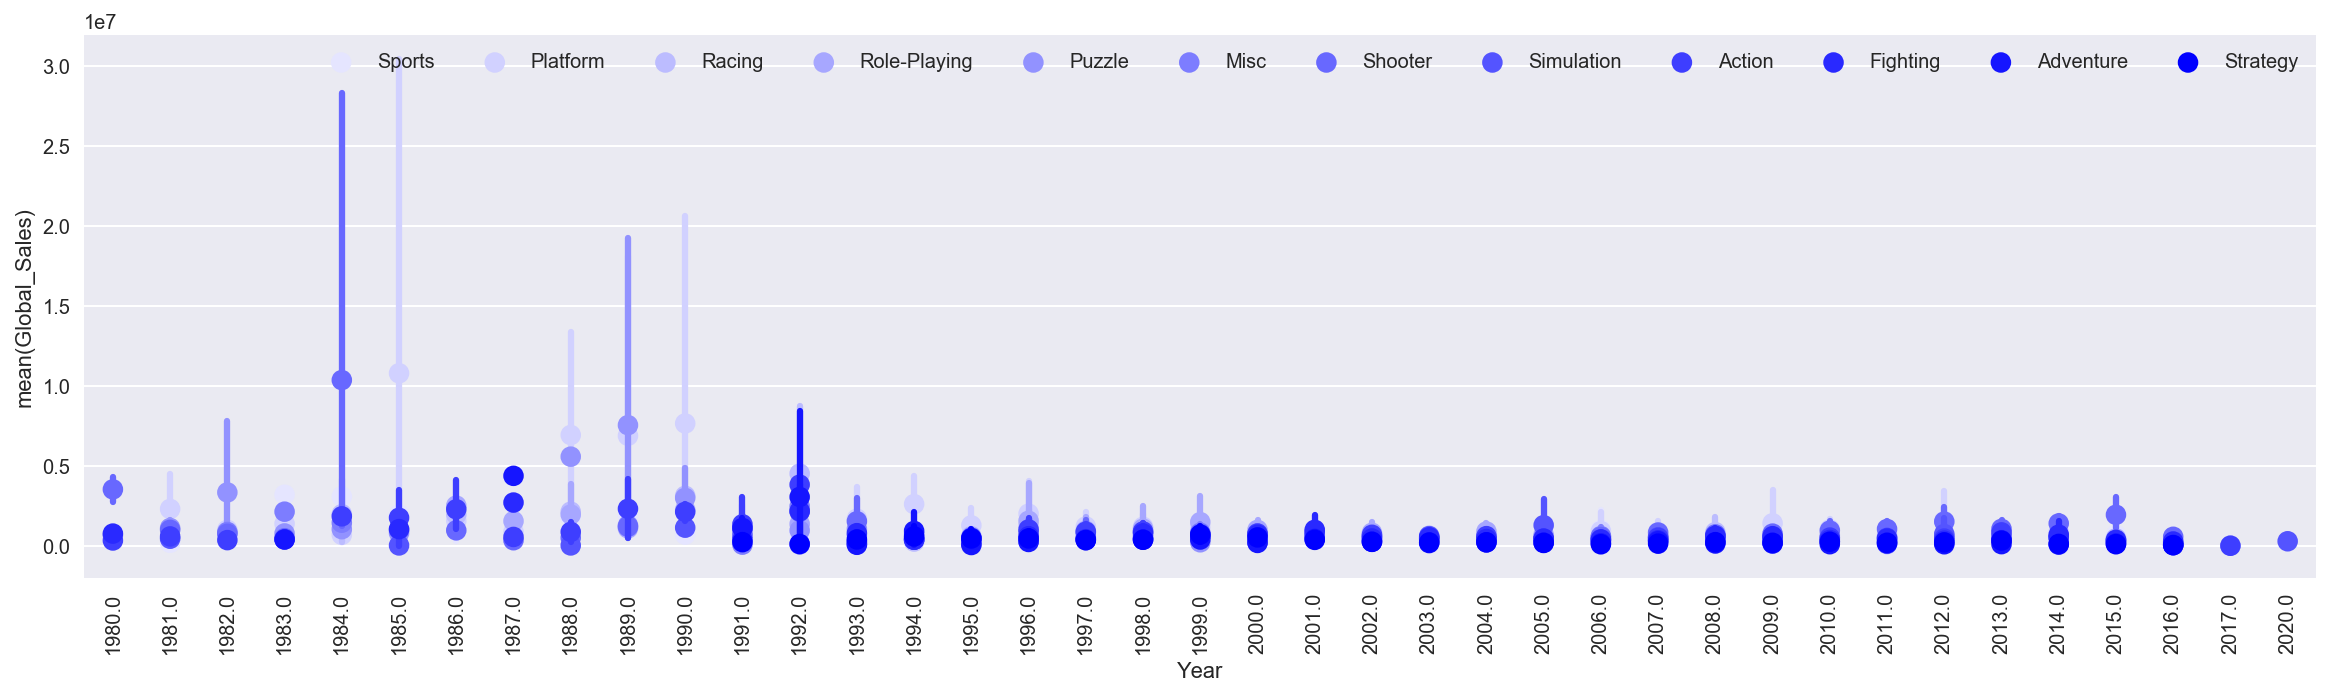

In [177]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.pointplot(data=vg, x='Year', y='Global_Sales', hue='Genre',
             color='blue', join=False)
plt.legend(loc='top', ncol=15)

### Top Video Games Scorecard

In [125]:
vg.sort_values(by=['Global_Sales'], ascending=False)[['Name','Publisher']].head(10)

,Name,Publisher
Rank,,
1,Wii Sports,Nintendo
2,Super Mario Bros.,Nintendo
3,Mario Kart Wii,Nintendo
4,Wii Sports Resort,Nintendo
5,Pokemon Red/Pokemon Blue,Nintendo
6,Tetris,Nintendo
7,New Super Mario Bros.,Nintendo
8,Wii Play,Nintendo
9,New Super Mario Bros. Wii,Nintendo
